In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [135]:
sales_df = pd.read_excel('data/Grupo_4.xlsx', sheet_name=['Santa Ana','La Floresta'])
sales_df['La Floresta']

,Fecha,Ventas
0,2023-01-01,16298.062460
1,2023-01-02,18711.283012
2,2023-01-03,19788.792981
3,2023-01-04,22003.462132
4,2023-01-05,20387.799178
...,...,...
360,2023-12-27,23014.794169
361,2023-12-28,22825.600188
362,2023-12-29,19173.296859
363,2023-12-30,22544.923294


In [152]:
# Agregamos dia de la semana y mes
for element in sales_df.values():
    element['Mes'] = element.Fecha.dt.month
    element['Dia Semana'] = element.Fecha.dt.day_of_week # 0=Monday and 6 Sunday


In [208]:
sales_df['La Floresta']
len(sales_df)

2

In [211]:
def generate_distribution(sales_df, column_name='Ventas'):
    fig = plt.figure(figsize=(12,6))
    gs = gridspec.GridSpec(ncols=len(sales_df), nrows=1, figure=fig)
    for index, key in enumerate(sales_df):
        ax1 = fig.add_subplot(gs[0, index])
        sns.ecdfplot(sales_df[key][column_name])
        ax1.set_title(key + " " + column_name)
# ax[0].legend(loc='upper right')
# ax[0].grid(True)
#     ax2 = fig.add_subplot(gs[0,1])
#     sns.ecdfplot(sales_df['La Floresta']['Ventas'])
#     ax2.set_title('Ventas La Floresta')

    plt.tight_layout()
    plt.show()

In [227]:
group= sales_df['Santa Ana'].groupby(by=['Mes'])
print(sales_df['Santa Ana'].groupby(by=['Mes']))

KeyboardInterrupt: 

In [206]:
# Mensual
sales_by_month = dict()
for key in sales_df:
    sales_by_month.update({key:sales_df[key].drop(columns=['Fecha', 'Dia Semana']).groupby(by=['Mes']).sum().reset_index()})


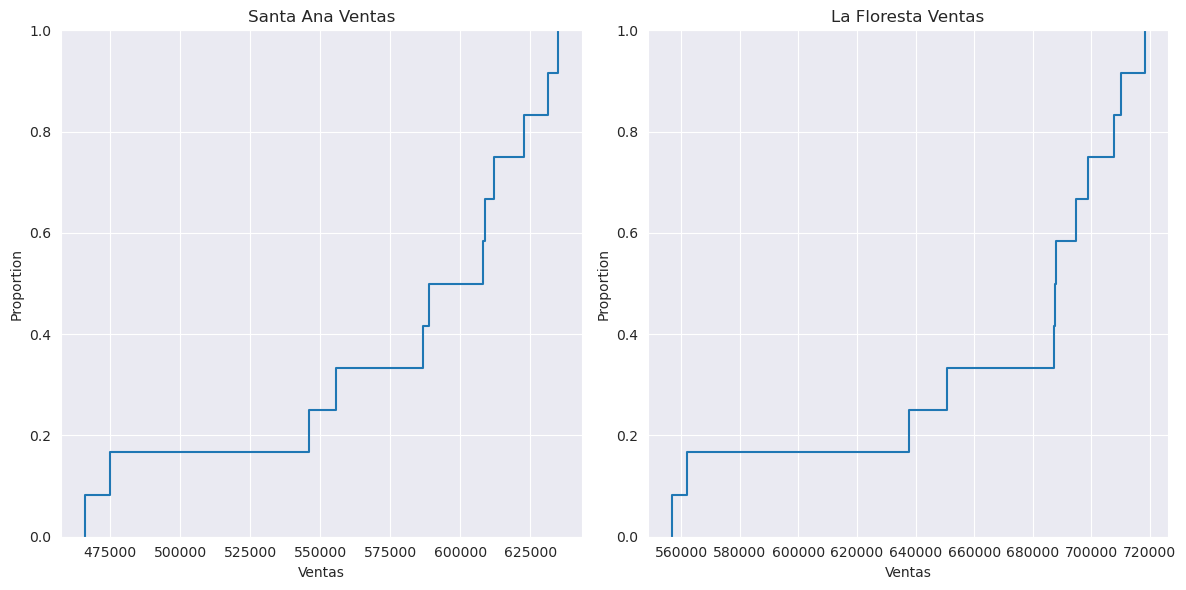

In [213]:
generate_distribution(sales_by_month, 'Ventas')

In [215]:
# Mensual
sales_by_day = dict()
for key in sales_df:
    sales_by_day.update({key:sales_df[key].drop(columns=['Fecha', 'Mes']).groupby(by=['Dia Semana']).sum().reset_index()})


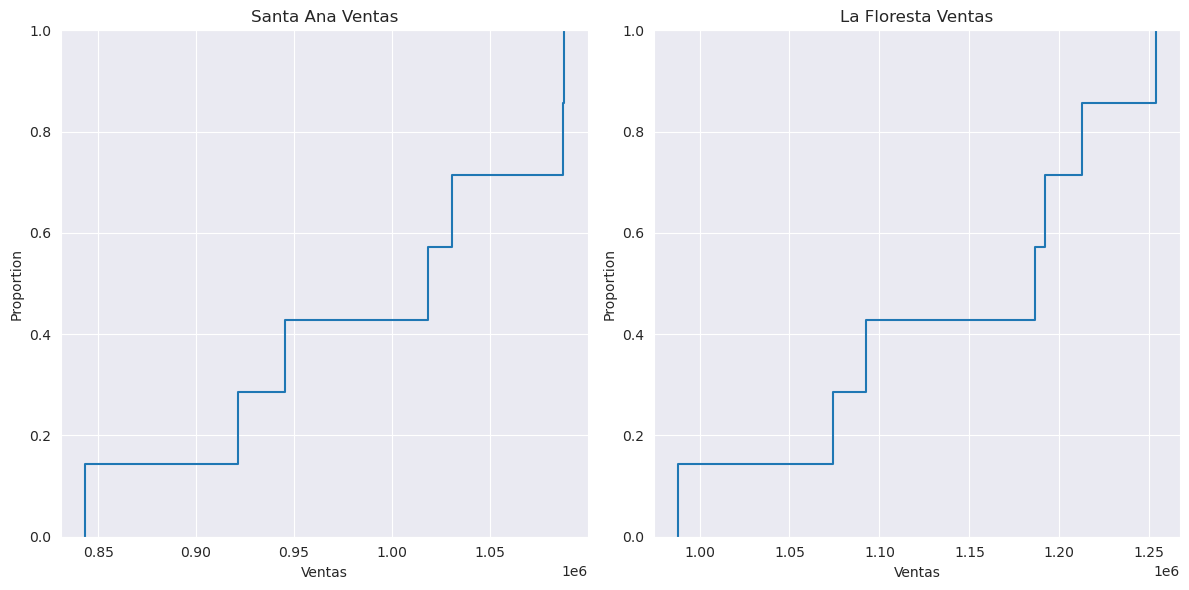

In [217]:
generate_distribution(sales_by_day, 'Ventas')

In [191]:
fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0,0])
sns.ecdfplot(sales_df['Santa Ana']['Ventas'])
ax1.set_title('Ventas Santa Ana')
# ax[0].legend(loc='upper right')
# ax[0].grid(True)
ax2 = fig.add_subplot(gs[0,1])
sns.ecdfplot(sales_df['La Floresta']['Ventas'])
ax2.set_title('Ventas La Floresta')

plt.tight_layout()
plt.show()

[    Mes         Ventas
 0     1  465944.752336
 1     2  474841.524307
 2     3  608682.360394
 3     4  545824.012150
 4     5  586583.739500
 5     6  607980.537281
 6     7  588900.539186
 7     8  631206.190555
 8     9  622671.568131
 9    10  634822.962316
 10   11  611994.882407
 11   12  555473.758702,
     Mes         Ventas
 0     1  556742.722359
 1     2  562152.025869
 2     3  710048.310232
 3     4  637701.804085
 4     5  687700.953280
 5     6  694858.471972
 6     7  687352.833553
 7     8  718145.182179
 8     9  687861.149494
 9    10  707654.146024
 10   11  698684.355151
 11   12  650710.687522]

0       9641.749108
1      10841.822125
2      11088.125026
3      11390.705369
4      11559.520356
           ...     
360    25144.445956
361    25339.750471
362    25367.035413
363    25528.860140
364    27801.523429
Name: Ventas, Length: 365, dtype: float64

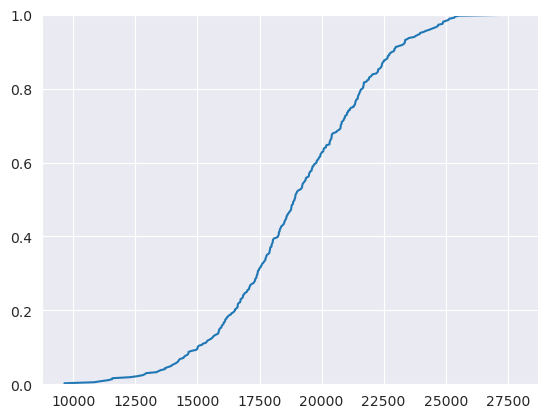

In [118]:
sales_ordered = sales_df[0].sort_values(by='Ventas', ascending=True).reset_index()
plt.plot(sales_ordered['Ventas'], (sales_ordered['Ventas'].index+1)/sales_ordered['Ventas'].size, scaley=False)
sales_ordered['Ventas']

<Axes: xlabel='Ventas', ylabel='Count'>

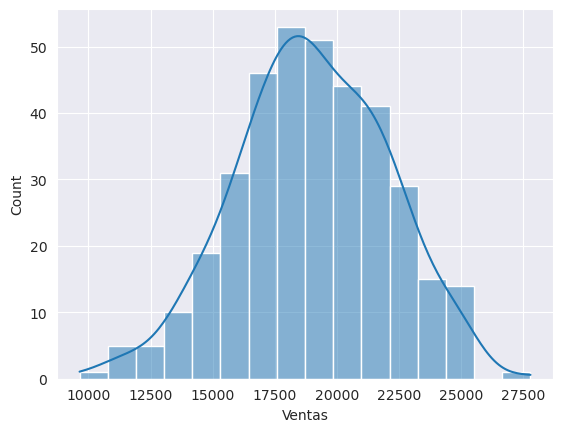

In [128]:
sns.histplot(sales_ordered['Ventas'], kde=True)

24

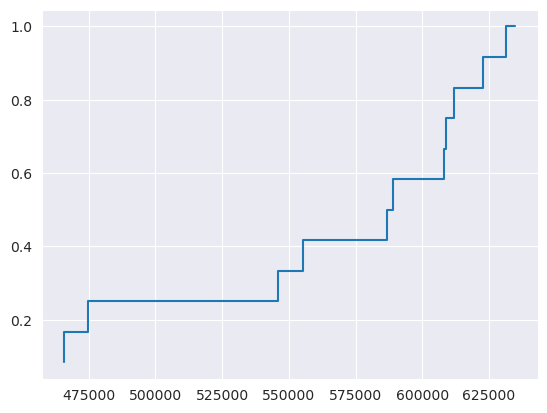

In [122]:
#Ventas Mensuales
sales_by_month = sales_df[0].drop(columns=['Fecha']).groupby(by=['Mes']).sum().reset_index()
sales_by_month_orderer = sales_by_month.sort_values(by='Ventas', ascending=True).reset_index(drop=True)
plt.step(sales_by_month_orderer['Ventas'], (sales_by_month_orderer.index+1)/sales_by_month_orderer.Ventas.size)
sales_by_month_orderer.size

<Axes: xlabel='Ventas', ylabel='Count'>

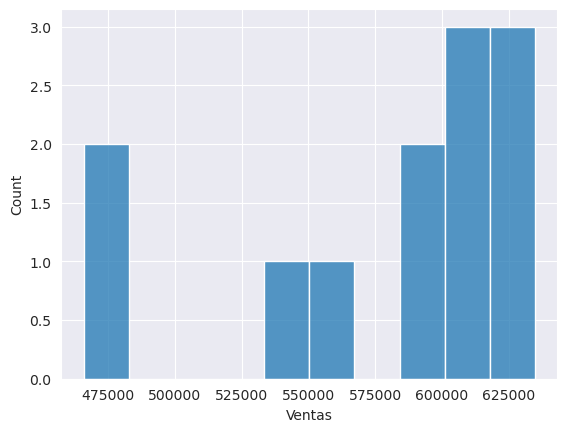

In [125]:
sns.histplot(sales_by_month_orderer['Ventas'], bins=10)